# Histogramm

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_histogram(data=None, class_edges=None, frequency_table=None, relative=False, 
                     title="Histogramm", xlabel=None, ylabel=None):
    """
    Erstellt ein Histogramm basierend auf den angegebenen Daten und Klassenrändern oder einer Häufigkeitstabelle.
    Optional kann die relative Häufigkeit berechnet und in Prozent auf der y-Achse angezeigt werden.
    Die Beschriftungen der Achsen und der Titel können über Parameter mitgegeben werden.

    Parameters
    ----------
    data : list or numpy array, optional
        Eine Liste oder ein Array von numerischen Werten, die im Histogramm dargestellt werden sollen. 
        Muss angegeben werden, wenn keine `frequency_table` übergeben wird.
        
    class_edges : list or numpy array, optional
        Eine Liste oder ein Array, das die Ränder der Klassen definiert, d.h., welche Intervalle 
        verwendet werden sollen, um die Daten zu gruppieren.
        
    frequency_table : dict, optional
        Ein Dictionary mit zwei Schlüsseln:
        - "Absolute Häufigkeit": Liste der absoluten Häufigkeiten für jede Klasse.
        - "Klassen": Liste der Klassenbezeichnungen (z. B. "[15,25)", "[25,35)", usw.).

    relative : bool, optional
        Wenn True, werden die relativen Häufigkeiten berechnet und die y-Achse zeigt Prozentwerte an.

    title : str, optional
        Der Titel des Diagramms. Standard ist "Histogramm".
        
    xlabel : str, optional
        Beschriftung der x-Achse. Standard ist "Klassen" oder "Klassenmitten" (abhängig von den Daten).
        
    ylabel : str, optional
        Beschriftung der y-Achse. Standard ist "Absolute Häufigkeit" oder "Relative Häufigkeit (%)".

    Returns
    -------
    hist : numpy array
        Ein Array mit den absoluten Häufigkeiten (oder relativen Häufigkeiten, wenn relative=True).
    
    class_centers : numpy array
        Ein Array mit den Mittelpunkten jeder Klasse, wenn mit Rohdaten gearbeitet wird.
    """
    
    fig, axes = plt.subplots(figsize=(8, 6))
    sns.set_palette("crest")
    
    if frequency_table is not None:
        # Wenn eine Häufigkeitstabelle übergeben wird, extrahiere die Daten daraus
        absolute_frequencies = frequency_table["Absolute Häufigkeit"]
        classes = frequency_table["Klassen"]
        
        # Berechne die relativen Häufigkeiten, falls `relative=True` ist
        if relative:
            total = sum(absolute_frequencies)
            absolute_frequencies = [(freq / total) * 100 for freq in absolute_frequencies]
            ylabel = ylabel if ylabel else "Relative Häufigkeit (%)"
        else:
            ylabel = ylabel if ylabel else "Absolute Häufigkeit"
        
        # Plot mit barplot, da die Häufigkeiten bereits vorgegeben sind
        sns.barplot(
            x=classes,
            y=absolute_frequencies,
            ax=axes,
            edgecolor='black'
        )
        
        for i, freq in enumerate(absolute_frequencies):
            if freq > 0:
                # Text oberhalb jedes Balkens
                axes.text(
                    i,
                    freq + 0.05 * max(absolute_frequencies),  # Direkt über dem Balken
                    f"{freq:.2f}%" if relative else str(int(freq)),  # Füge Prozentzeichen hinzu
                    ha="center",
                    fontsize=8
                )
                # Optional: Vertikale gestrichelte Linien
                axes.vlines(
                    x=i,     
                    ymin=0,                 
                    ymax=freq,           
                    color="grey",        
                    linestyle="--",       
                    alpha=0.3   
                )
    else:
        # Wenn keine Häufigkeitstabelle übergeben wurde, arbeite mit den Rohdaten
        if data is None or class_edges is None:
            raise ValueError("Entweder 'data' und 'class_edges' oder 'frequency_table' muss übergeben werden.")
        
        hist, bin_edges = np.histogram(data, bins=class_edges)
        class_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Berechne die relativen Häufigkeiten, falls `relative=True` ist
        if relative:
            total = np.sum(hist)
            hist = (hist / total) * 100
            ylabel = ylabel if ylabel else "Relative Häufigkeit (%)"
        else:
            ylabel = ylabel if ylabel else "Absolute Häufigkeit"

        # Plot das Histogramm
        sns.histplot(
            data,
            bins=class_edges,
            kde=False,
            ax=axes,
            edgecolor='black'
        )

        # Füge Text und vertikale Linien hinzu
        for i in range(len(hist)):
            if hist[i] > 0:
                axes.text(
                    class_centers[i],
                    hist[i] + 0.05,
                    f"{hist[i]:.2f}%" if relative else str(hist[i]),  # Füge Prozentzeichen hinzu
                    ha="center",
                    fontsize=8
                )
                axes.vlines(
                    x=class_centers[i],     
                    ymin=0,                 
                    ymax=hist[i],           
                    color="grey",        
                    linestyle="--",       
                    alpha=0.3   
                )

    # Setze die Achsenbeschriftungen und den Titel
    axes.set_title(title, pad=20)
    axes.set_xlabel(xlabel if xlabel else ("Klassen" if frequency_table is not None else "Klassenmitten"))
    axes.set_ylabel(ylabel)
    
    if relative:
        # Formatierte Anzeige der y-Achse in Prozent, wenn relative=True
        axes.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
    
    axes.grid(True, linestyle="--", alpha=0.7, axis="y")
    
    sns.despine()

    plt.tight_layout()

    if frequency_table is not None:
        return absolute_frequencies, classes
    else:
        return hist, class_centers


## 1. Beispiel

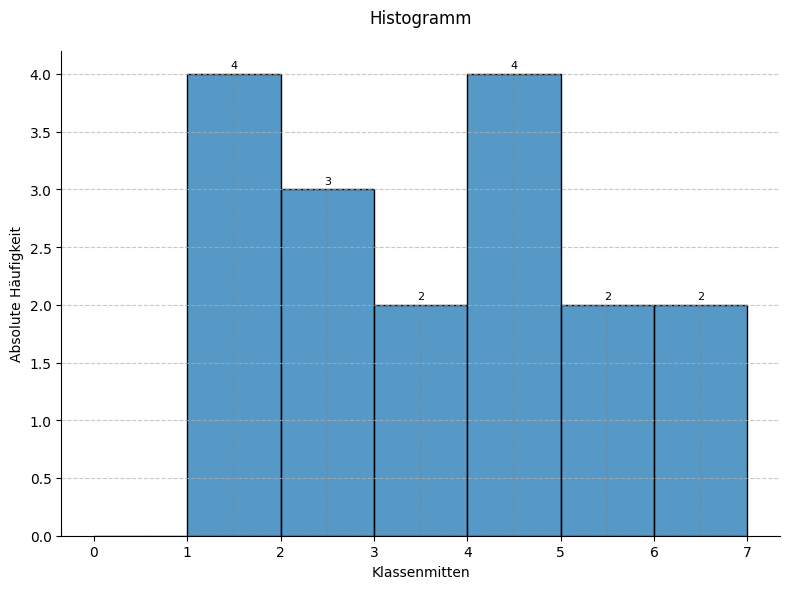

In [8]:
# Add classes here:
class_edges = [0, 1, 2, 3, 4, 5, 6, 7]
# Add data here:
data = [5.25, 6.15, 5.67, 1.365, 4.2, 6.84, 1.095, 4.725, 3.6, 4.8, 2.7, 2.64, 1.02, 1.47, 2.01, 4.425, 3.1]

hist, class_centers = create_histogram(data=data, class_edges=class_edges)


## 2. Beispiel

([19.32012299282542,
  22.377861291424665,
  23.60778954560984,
  19.875298940895114,
  14.81892722924496],
 ['[15,25)', '[25,35)', '[35,45)', '[45,55)', '[55,65)'])

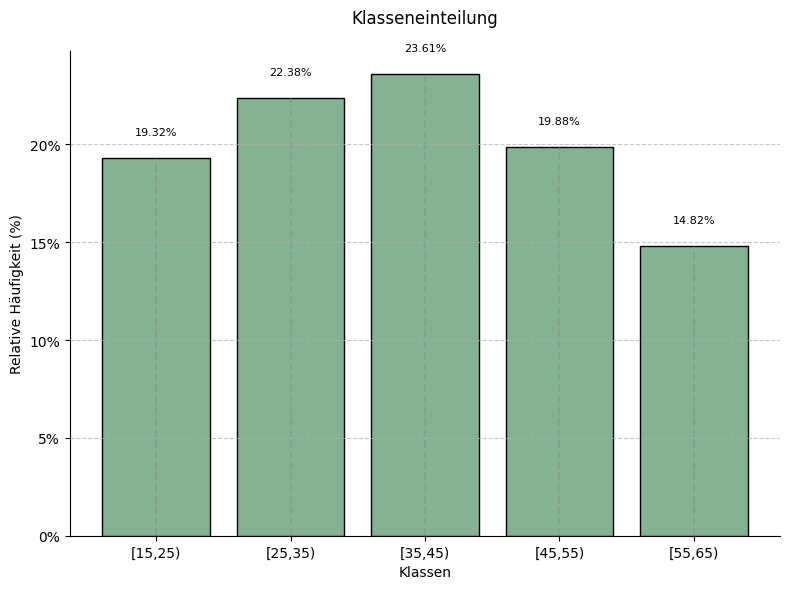

In [9]:
frequency_table = {
    "Absolute Häufigkeit": [2262, 2620, 2764, 2327, 1735],
    "Klassen": ["[15,25)", "[25,35)", "[35,45)", "[45,55)", "[55,65)" ]
}

create_histogram(frequency_table=frequency_table, relative=True, title="Klasseneinteilung")